<a href="https://colab.research.google.com/github/Baldros/InfluencersSpreadsheet/blob/main/TratamentoPlanilhaInfluenciadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 52.2 MB/s eta 0:00:00


# Download dos Dados:

In [2]:
import requests

In [3]:
# URL do arquivo no Google Drive
download_url = f"https://drive.google.com/uc?id=1oq1nPOKMWAHCCdRzlRJZsaKFsgrrDmjH&export=download"

# Nome do arquivo local
output_file = "planilhaInfluencers.pdf"

try:
    # Fazer a solicitação ao Google Drive
    response = requests.get(download_url, stream=True)
    response.raise_for_status()  # Verificar se houve erro

    # Escrever o conteúdo em um arquivo local
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:  # Filtrar chunks vazios
                file.write(chunk)

    print(f"Arquivo baixado com sucesso: {output_file}")
except Exception as e:
    print(f"Erro ao baixar o arquivo: {e}")


Arquivo baixado com sucesso: planilhaInfluencers.pdf


# Tramento dos dados:


In [6]:
from tabula import read_pdf
import pandas as pd

In [7]:
# Caminho do arquivo PDF
pdf_path = "/content/planilhaInfluencers.pdf"

# Extraindo tabelas do PDF
# 'lattice=True' funciona bem para tabelas com bordas; caso não funcione, tente 'stream=True'
tables = read_pdf(pdf_path, pages="all", lattice=True)

In [8]:
df = tables[0]

# Remover a linha 0 e redefinir a linha 1 como cabeçalho
df.columns = df.iloc[1]  # Define a linha 1 como cabeçalho
df = df[2:]  # Remove a linha 0

# Resetar o índice do DataFrame
df.reset_index(drop=True, inplace=True)

# Exibir o DataFrame ajustado
display(df)

1,Carimbo de data/hora,Nome do influencer,Qual o @ (identifica a rede),Qual a nota desse influ?,Quando trabalhou com esse influ?,Como foi trabalhar com esse influ?,Conselho p/ colegas da área
0,11/10/24 18:50,Gil do Vigor,@gildovigor,10,jun.-21,"No começo ele é meio tímido, mas vai\rse solta...",NaN
1,11/11/24 11:44,Mohamad (ex-\rmasterchef),@mohindi,4,2023,"Um caos, simplesmente impossível\rconseguir ag...",Existem outros influenciadores de\rgastronomia...
2,11/11/24 11:52,Gabriela Bailas (Física e\rafins),@bibibailas,8,abr.-24,"A entrega em si foi boa, entregou o que\rfoi c...","Tenha paciência que o conteúdo\rserá bom, a as..."
3,11/11/24 14:52,Paola Antonini,@paola_antonini - IG,1,segundo semestre de 2024,terrível! ela não cumpre prazos e mente\rdesca...,"para quem for trabalhar com ela,\rtenha muuuuu..."
4,11/11/24 18:06,Lara Cunha,@pear.lara,9,fev.-24,Uma grande querida! Traz ideias legais\rnas re...,Precisando de influ de lifestyle pra\rpúblico ...
5,11/11/24 18:11,Lucas Barreto,@barretovs - ig,6,2023,"Pressão mais baixa que a minha, era\rdifícil e...",Envie o direcional com roteiro já\raprovado na...


In [9]:
for page in range(1,len(tables)):
  try:
    df_temp = tables[page].copy()
    if df_temp.shape[1] == 8:
      df_temp.drop("Unnamed: 0", axis=1, inplace = True)

    header_index = df_temp.shape[0]+1
    df_temp.loc[header_index] = df_temp.columns
    df_temp.columns = df.columns
    df_temp.reset_index(drop=True, inplace=True)

    df = pd.concat([df, df_temp]).copy()
    df.reset_index(drop=True, inplace=True)

  except Exception as e:
    print(f"Erro nessa porra {e}")
    print(page)

In [10]:
# Dataframe completo:
df

1,Carimbo de data/hora,Nome do influencer,Qual o @ (identifica a rede),Qual a nota desse influ?,Quando trabalhou com esse influ?,Como foi trabalhar com esse influ?,Conselho p/ colegas da área
0,11/10/24 18:50,Gil do Vigor,@gildovigor,10,jun.-21,"No começo ele é meio tímido, mas vai\rse solta...",NaN
1,11/11/24 11:44,Mohamad (ex-\rmasterchef),@mohindi,4,2023,"Um caos, simplesmente impossível\rconseguir ag...",Existem outros influenciadores de\rgastronomia...
2,11/11/24 11:52,Gabriela Bailas (Física e\rafins),@bibibailas,8,abr.-24,"A entrega em si foi boa, entregou o que\rfoi c...","Tenha paciência que o conteúdo\rserá bom, a as..."
3,11/11/24 14:52,Paola Antonini,@paola_antonini - IG,1,segundo semestre de 2024,terrível! ela não cumpre prazos e mente\rdesca...,"para quem for trabalhar com ela,\rtenha muuuuu..."
4,11/11/24 18:06,Lara Cunha,@pear.lara,9,fev.-24,Uma grande querida! Traz ideias legais\rnas re...,Precisando de influ de lifestyle pra\rpúblico ...
...,...,...,...,...,...,...,...
473,1/23/25 14:18,Gil do Vigor,gildovigor,9,2022,"Ele entrega MUITO resultado, tem uma\rbase bem...",NaN
474,1/23/25 14:18,Raquele Cardozo,raquele.cardozo,10,2024,"Ela é fofa, simpática e educada. Muito\rprofis...",NaN
475,1/23/25 14:16,Marco Luque,marcoluque - ig,10,2024 os 2 semestres,Cara incrível. Entrega tudo e mais um\rpouco d...,podem contratar
476,1/23/25 14:18,Luiza Quintela,@luizaquintela,10,2024,"Luiza é maravilhosa. Extremamente\rparceira, m...",Contratem a diva da dermato\rporque é sucesso ...


In [11]:
import numpy as np

In [13]:
for i in range(len(df)):
    try:
        # Tentando converter o valor para inteiro
        df.loc[i, 'Qual a nota desse influ?'] = int(df.loc[i, 'Qual a nota desse influ?'])
    except ValueError:
        # Se der erro, substitui por NaN
        df.loc[i, 'Qual a nota desse influ?'] = np.nan

In [14]:
df.info("columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Carimbo de data/hora                474 non-null    object
 1   Nome do influencer                  474 non-null    object
 2   Qual o @ (identifica a rede)        474 non-null    object
 3   Qual a nota desse influ?            474 non-null    object
 4   Quando trabalhou com esse influ?    473 non-null    object
 5   Como foi trabalhar com esse influ?  478 non-null    object
 6   Conselho p/ colegas da área         411 non-null    object
dtypes: object(7)
memory usage: 26.3+ KB


In [15]:
df

1,Carimbo de data/hora,Nome do influencer,Qual o @ (identifica a rede),Qual a nota desse influ?,Quando trabalhou com esse influ?,Como foi trabalhar com esse influ?,Conselho p/ colegas da área
0,11/10/24 18:50,Gil do Vigor,@gildovigor,10,jun.-21,"No começo ele é meio tímido, mas vai\rse solta...",NaN
1,11/11/24 11:44,Mohamad (ex-\rmasterchef),@mohindi,4,2023,"Um caos, simplesmente impossível\rconseguir ag...",Existem outros influenciadores de\rgastronomia...
2,11/11/24 11:52,Gabriela Bailas (Física e\rafins),@bibibailas,8,abr.-24,"A entrega em si foi boa, entregou o que\rfoi c...","Tenha paciência que o conteúdo\rserá bom, a as..."
3,11/11/24 14:52,Paola Antonini,@paola_antonini - IG,1,segundo semestre de 2024,terrível! ela não cumpre prazos e mente\rdesca...,"para quem for trabalhar com ela,\rtenha muuuuu..."
4,11/11/24 18:06,Lara Cunha,@pear.lara,9,fev.-24,Uma grande querida! Traz ideias legais\rnas re...,Precisando de influ de lifestyle pra\rpúblico ...
...,...,...,...,...,...,...,...
473,1/23/25 14:18,Gil do Vigor,gildovigor,9,2022,"Ele entrega MUITO resultado, tem uma\rbase bem...",NaN
474,1/23/25 14:18,Raquele Cardozo,raquele.cardozo,10,2024,"Ela é fofa, simpática e educada. Muito\rprofis...",NaN
475,1/23/25 14:16,Marco Luque,marcoluque - ig,10,2024 os 2 semestres,Cara incrível. Entrega tudo e mais um\rpouco d...,podem contratar
476,1/23/25 14:18,Luiza Quintela,@luizaquintela,10,2024,"Luiza é maravilhosa. Extremamente\rparceira, m...",Contratem a diva da dermato\rporque é sucesso ...


In [16]:
# Salvando DataFrame:
df.to_csv("influenciadores.csv", index=False)

# Visualizações:

In [111]:
from matplotlib import pyplot as plt
import seaborn as sns

In [98]:
for key in df.keys():
  print(key)

Carimbo de data/hora
Nome do influencer
Qual o @ (identifica a rede)
Qual a nota desse influ?
Quando trabalhou com esse influ?
Como foi trabalhar com esse influ?
Conselho p/ colegas da área


<Axes: xlabel='Qual a nota desse influ?', ylabel='Count'>

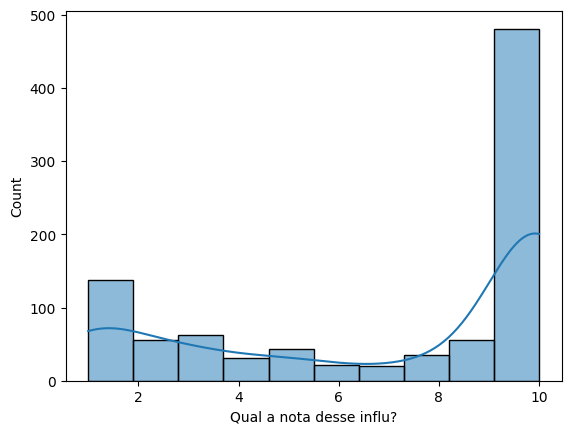

In [118]:
sns.histplot(df["Qual a nota desse influ?"], bins=10, kde=True)

In [119]:
df["Nome do influencer"].value_counts()

,count
Nome do influencer,
Malu Borges,14
Bagi,8
Jade Picon,8
Caio Castro,8
Larissa Manoela,6
...,...
Matheus,2
Mohamad Hindi,2
Gabriela Bailas (Física e\rafins),1


In [196]:
def plot_influencer(influencer):
    df_temp = df[df["Nome do influencer"] == influencer]

    # Criando o gráfico de barras
    ax = sns.countplot(x="Qual a nota desse influ?", data=df_temp)

    # Adicionando uma linha pontilhada para cada barra, baseada no valor da barra
    for p in ax.patches:
        # Obtendo a altura de cada barra
        altura_barra = p.get_height()

        # Desenhando a linha pontilhada na altura da barra
        ax.axhline(y=altura_barra, color='red', linestyle='--')

    # Personalizando o gráfico
    plt.title(f"Distribuição das notas para {influencer}")
    plt.xlabel("Nota(s) que o influenciador recebeu")
    plt.ylabel("Contagem")
    plt.show()

In [166]:
def experiencia_com_influencer(influencer, tratamento = "\n"):

  textos = []
  qtd_experiencias = df[df["Nome do influencer"]==influencer]["Como foi trabalhar com esse influ?"].shape[0]
  qtd_conselhos = df[df["Nome do influencer"]==influencer]["Conselho p/ colegas da área"].shape[0]

  for i in range(qtd_experiencias):
    textos.append("Experiência:\n" + df[df["Nome do influencer"]==influencer]["Como foi trabalhar com esse influ?"].iloc[i])
    textos.append("Conselho para Colegas:\n" + df[df["Nome do influencer"]==influencer]["Conselho p/ colegas da área"].iloc[i])

  for texto in textos:
    texto_limpo = texto.replace('\r', tratamento) # Removendo todos os caracteres \r
    print(texto_limpo,"\n")

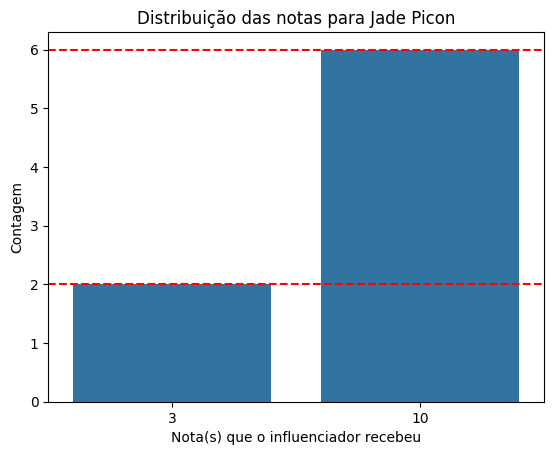

In [197]:
plot_influencer("Jade Picon")

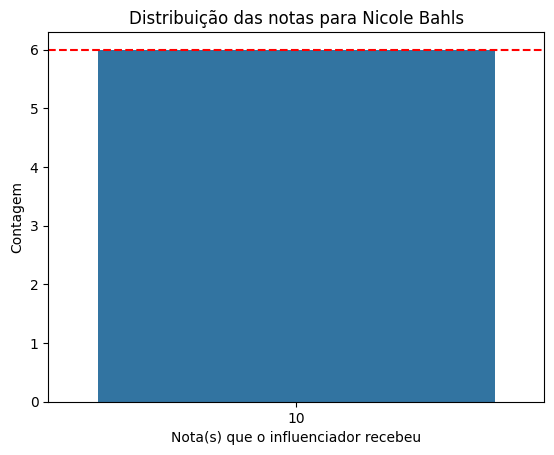

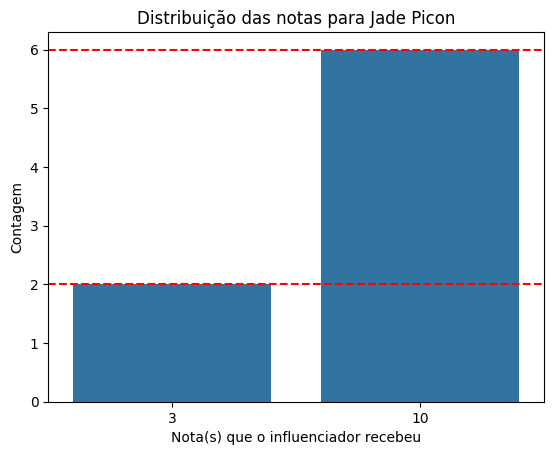

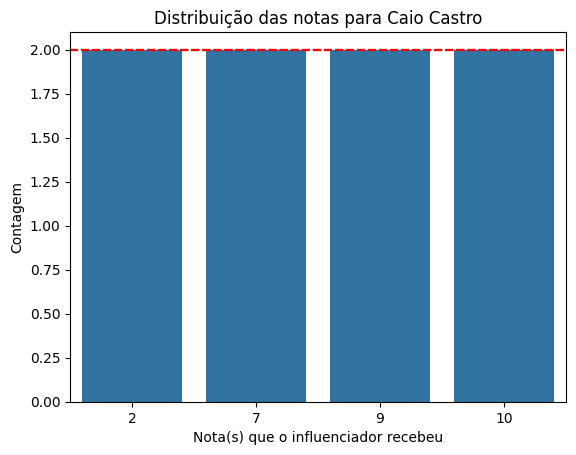

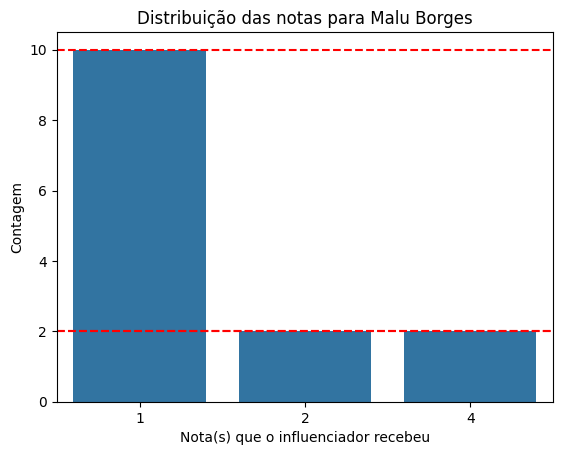

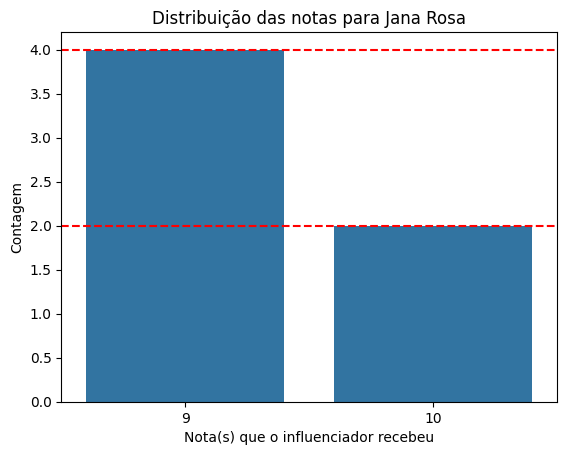

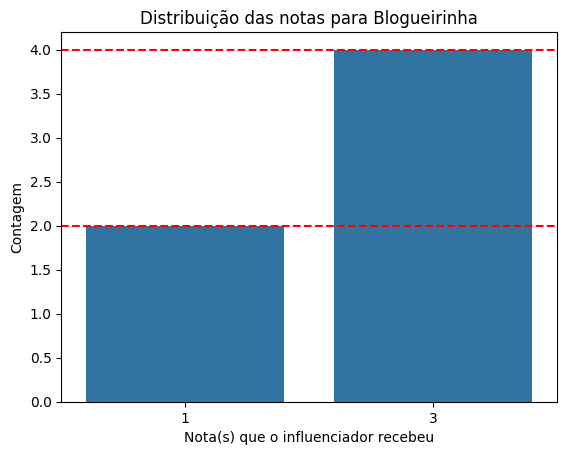

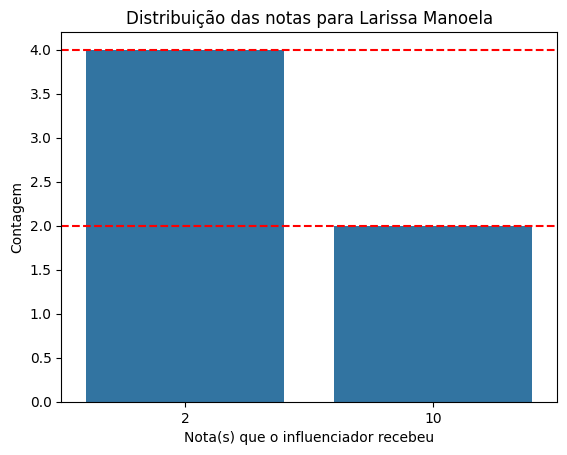

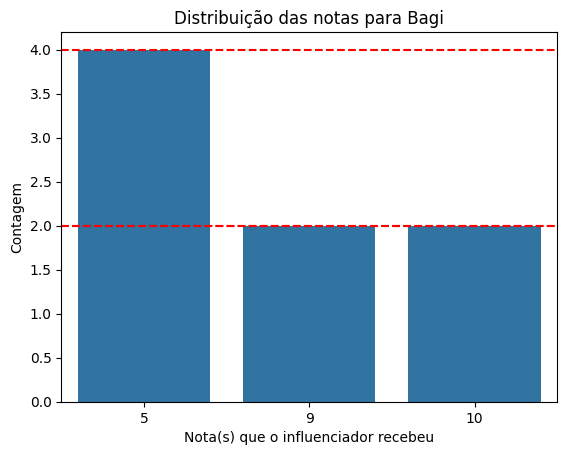

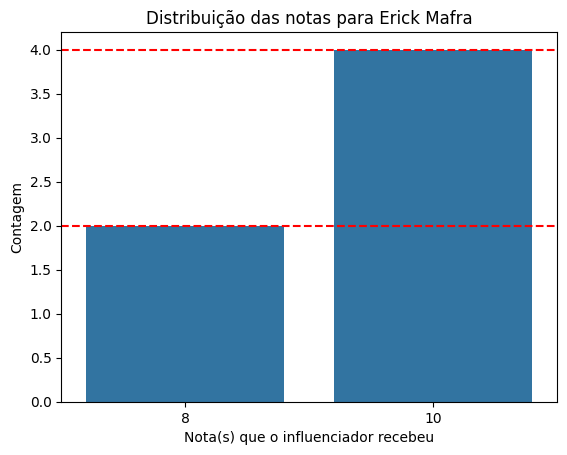

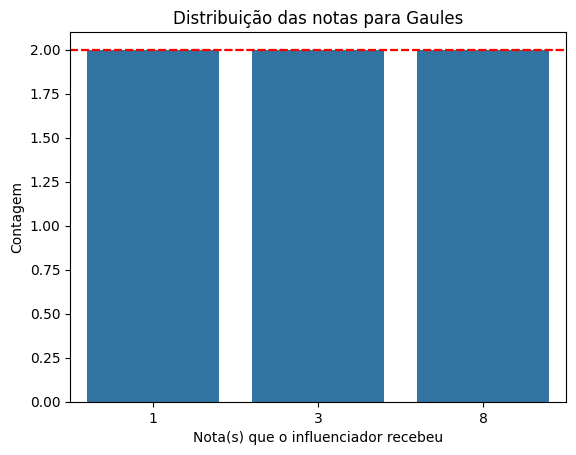

In [199]:
for influencer in df["Nome do influencer"].unique():
  if df[df["Nome do influencer"] == influencer].shape[0] > 5:
    plot_influencer(influencer)